In [1]:
from utils.ActionGenerator import ActionsGenerator
from utils.plot_regret import plot_regret 
from utils.Play import play 
from utils.Experiment import experiment
from Agents.UCB import UCB
from Agents.LinUCB import LinUCB
from Agents.RB_agent import RegretBalancingAgent
from Agents.RB_representation import RegretBalancing_Representation
from environments.BanditEnv import BanditEnv
from environments.BernoulliBanditEnv import BernoulliBanditEnv
from environments.LinearBandit import LinearBandit
from kaggle_environments import make, evaluate
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from Agents.EpsilonGreedy import EpsilonGreedy
import random
np.random.seed(1306)

C:\Users\theom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading environment llm_20_questions failed: Failed to import transformers.models.t5.modeling_t5 because of the following error (look up to see its traceback):
No module named 'torch._custom_ops'


# Regret Balancing for Bandits : Experience 1 

In [2]:
# Code du chef, à supprimer ? 
""" 
n_arms = 4
means = [0.1, 0.2, 0.3, 0.4]
n_rounds = 1000
delta = 0.1
env = BernoulliBanditEnv(means = means)
ucb_agent = UCB(K = len(means), var = 1.0)
rb_agent = RegretBalancing_Representation(baseAlgo = , 
                                          K = len(means), 
                                          u_bound = , 
                                          env = env)

# Run the experiment
Nmc = 100  # Number of Monte Carlo simulations
T = 1000  # Number of rounds
agents = [ucb_agent, rb_agent]
all_data = experiment(env, agents, Nmc, T)
# Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)
"""

' \nn_arms = 4\nmeans = [0.1, 0.2, 0.3, 0.4]\nn_rounds = 1000\ndelta = 0.1\nenv = BernoulliBanditEnv(means = means)\nucb_agent = UCB(K = len(means), var = 1.0)\nrb_agent = RegretBalancing_Representation(baseAlgo = , \n                                          K = len(means), \n                                          u_bound = , \n                                          env = env)\n\n# Run the experiment\nNmc = 100  # Number of Monte Carlo simulations\nT = 1000  # Number of rounds\nagents = [ucb_agent, rb_agent]\nall_data = experiment(env, agents, Nmc, T)\n# Plot results\nplot_regret(regrets = all_data, logscale = False, lb = None, q = 10)\n'

/Users/augustincablant/Documents/GitHub/Advanced-ML/src/utils/plot_regret.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  reg_plot.show()


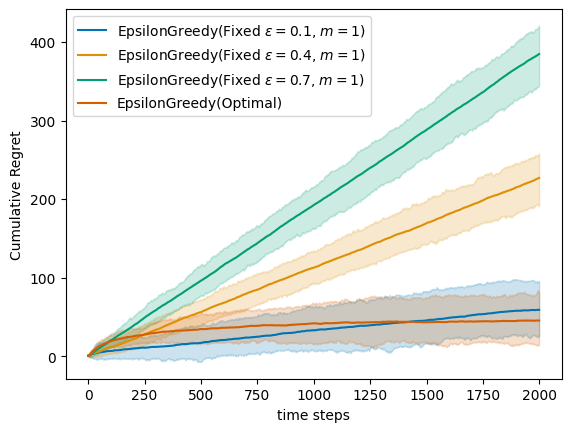

In [3]:
n_arms = 2
means = [0.2, 0.75]
env = BernoulliBanditEnv(means = means)
n_rounds = 1000
delta = 0.1
eps0 = EpsilonGreedy(K=len(means), eps = 0.1, FixedEpsilon = True, m = 1) 
eps04 = EpsilonGreedy(K=len(means), eps = 0.4, FixedEpsilon = True, m = 1) 
eps07 = EpsilonGreedy(K=len(means), eps = 0.7, FixedEpsilon = True, m = 1) 
epsOpti = EpsilonGreedy(K=len(means), Delta = 0.55, m = 1)
epsAlgo = [eps0, eps04, eps07, epsOpti]
Nmc = 100  
T = 2000  
all_data = experiment(env, epsAlgo, Nmc, T)
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)

/Users/augustincablant/Documents/GitHub/Advanced-ML/src/utils/plot_regret.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  reg_plot.show()


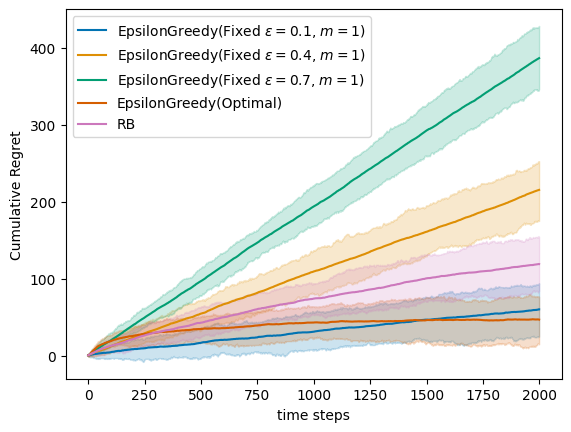

In [9]:
n_arms = 2
means = [0.2, 0.75]
env = BernoulliBanditEnv(means = means)
n_rounds = 1000
delta = 0.1
eps0 = EpsilonGreedy(K=len(means), eps = 0.1, FixedEpsilon = True, m = 1) 
eps04 = EpsilonGreedy(K=len(means), eps = 0.4, FixedEpsilon = True, m = 1) 
eps07 = EpsilonGreedy(K=len(means), eps = 0.7, FixedEpsilon = True, m = 1) 
epsOpti = EpsilonGreedy(K=len(means), Delta = 0.55, m = 1)
epsAlgo = [eps0, eps04, eps07, epsOpti]
rb_agent = RegretBalancingAgent(learners = epsAlgo, 
                                K = n_arms, 
                                delta = delta, 
                                u_bounds = [lambda x : np.sqrt(x * n_arms) for _ in range(len(epsAlgo))],
                                env = env)
eps_rb = [eps0, eps04, eps07, epsOpti, rb_agent]
Nmc = 100  
T = 2000  
all_data = experiment(env, eps_rb, Nmc, T)
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10, save_pdf = 'Regret_Balancing_EpsGreedy.pdf')

/Users/augustincablant/Documents/GitHub/Advanced-ML/src/utils/plot_regret.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  reg_plot.show()


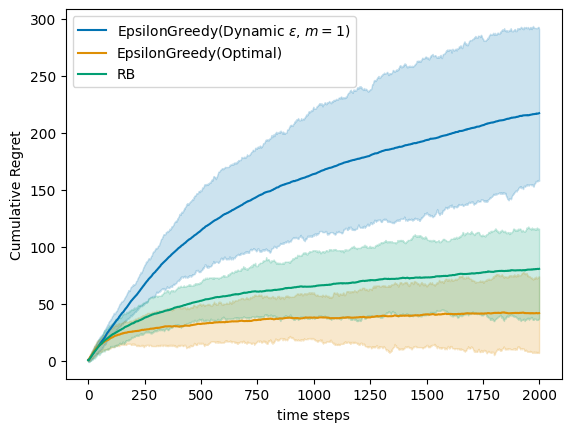

In [8]:
n_arms = 2
means = [0.2, 0.75]
env = BernoulliBanditEnv(means = means)
n_rounds = 1000
delta = 0.1
eps0_vary = EpsilonGreedy(K=len(means), FixedEpsilon = False, m = 1) 
epsOpti = EpsilonGreedy(K=len(means), Delta = 0.55, m = 1)
epsAlgo = [eps0_vary, epsOpti]
rb_agent = RegretBalancingAgent(learners = epsAlgo, 
                                K = n_arms, 
                                delta = delta, 
                                u_bounds = [lambda x : np.sqrt(x * n_arms) for _ in range(len(epsAlgo))],
                                env = env)
eps_rb = [eps0_vary, epsOpti, rb_agent]
Nmc = 100  
T = 2000  
all_data = experiment(env, eps_rb, Nmc, T)
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10, save_pdf = 'Regret_Balancing_EpsGreedy_not_fix.pdf')

In [7]:
all_data.keys()

dict_keys(['EpsilonGreedy(Fixed $\\epsilon = 0.1$, $m = 1$)', 'EpsilonGreedy(Fixed $\\epsilon = 0.4$, $m = 1$)', 'EpsilonGreedy(Fixed $\\epsilon = 0.7$, $m = 1$)', 'EpsilonGreedy(Optimal)', 'RB'])

In [9]:
reg_plot = plt.figure()
#compute useful stats
#     regret_stats = {}

data = all_data['EpsilonGreedy(Fixed $\\epsilon = 0.1$, $m = 1$)']
N, T = data.shape
cumdata = np.cumsum(data, axis=1) # cumulative regret

mean_reg = np.mean(cumdata, axis=0)
q_reg = np.percentile(cumdata, 0.05, axis=0)
Q_reg = np.percentile(cumdata, 100-0.05, axis=0)

#         regret_stats[agent_id] = np.array(mean_reg, q_reg, Q_reg)

plt.plot(np.arange(T), mean_reg)
plt.fill_between(np.arange(T), q_reg, Q_reg, alpha=0.2)

plt.xlabel('time steps')
plt.ylabel('Cumulative Regret')
plt.legend()
reg_plot.show()

Error in callback <function _draw_all_if_interactive at 0x10ed6fba0> (for post_execute), with arguments args (),kwargs {}:


/var/folders/t6/khg6jj9s4_b0lqrt24p4bvs00000gn/T/ipykernel_5218/707627618.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/t6/khg6jj9s4_b0lqrt24p4bvs00000gn/T/ipykernel_5218/707627618.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  reg_plot.show()


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

In [2]:
d = 10  # dimension
K = 5 # number of arms

# parametor vector \theta, normalized :
thetaTrue = ActionsGenerator(1,d)[0]
thetaTrue /= np.linalg.norm(thetaTrue)

T = 2000  # Finite Horizon
N = 100  # Monte Carlo simulations

delta = 0.1 
sigma = 0.1

#choice of percentile display
q = 10

In [4]:

actionSet = random.shuffle(ActionsGenerator(K,d))
env = LinearBandit(thetaTrue, K, var=sigma**2, fixed_actions=actionSet)



In [5]:
linucb = LinUCB(d=d, lambda_reg=1., delta=delta, sigma=sigma)
ucb = UCB(K=K, alpha=2.)

UCBs = [linucb, ucb]


In [6]:
rb_agent = RegretBalancingAgent(learners = UCBs, 
                                K = K, 
                                delta = delta, 
                                u_bounds = [lambda x : np.sqrt(x * K) for _ in range(len(UCBs))],
                                env = env)

In [7]:
agents = [linucb, ucb, rb_agent]

In [8]:
Nmc = 100  
T = 100  
all_data = experiment(env, agents, Nmc, T, bern=False)

c:\Users\theom\Desktop\AML\Advanced-ML\src\utils\plot_regret.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  reg_plot.show()


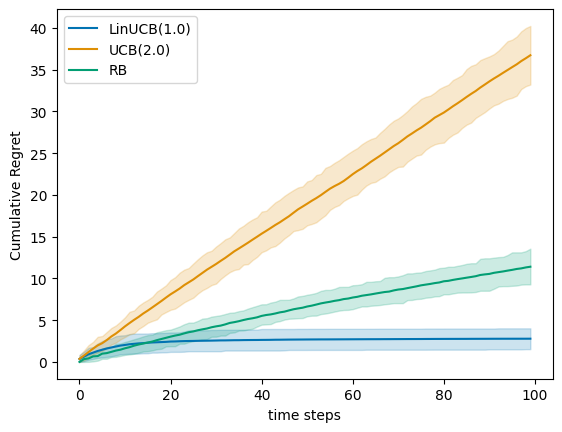

In [9]:
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)

# Regret Balancing for Bandits : Experience 2 (Optimizing the Exploration Rate)

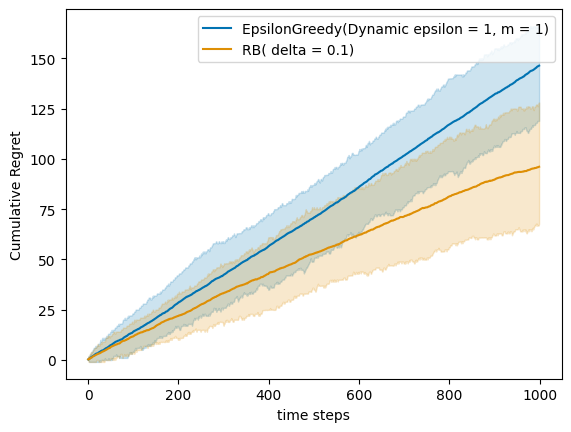

In [6]:
base_algorithms = [EpsilonGreedy(K=len(means), eps = 2 ** (-i), FixedEpsilon = True, m = 1) for i in range(1, 19)]

delta = 0.1  # Confidence level for regret balancing
rb_agent = RegretBalancingAgent(K = len(means), delta = delta)

# Experiment
algorithms = base_algorithms + [rb_agent]
all_data = experiment(env, algorithms, Nmc, T)

# Plotting results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)

# Regret Balacing Experiment 3 : Representation Learning

In [16]:
d = 10  # dimension
K = 200  # number of arms

# parametor vector \theta, normalized :
thetaTrue = ActionsGenerator(1,d)[0]
thetaTrue /= np.linalg.norm(thetaTrue)

T = 100  # Finite Horizon
N = 10  # Monte Carlo simulations

delta = 0.1 
sigma = 1.

#choice of percentile display
q = 10

In [18]:
actionSet = ActionsGenerator(K,d)
env = LinearBandit(thetaTrue, K, var=sigma**2, fixed_actions=actionSet)

In [24]:
linucb1 = LinUCB(d, delta, sigma=sigma, prefactor=1.0)
linucb2 = LinUCB(d, delta, sigma=sigma, lambda_reg=1., prefactor=-1.0)
linucb3 = LinUCB(d, delta, sigma=sigma, lambda_reg=1., prefactor=5.0)

TypeError: LinUCB.__init__() got an unexpected keyword argument 'prefactor'

In [ ]:
n_arms = 4
means = [0.1, 0.2, 0.3, 0.4]
n_rounds = 1000
delta = 0.1
env = LinearBandit()
linUcb_agent = LinUCB()
Nmc = 100  # Number of Monte Carlo simulations
T = 1000  # Number of rounds
agents = [ucb_agent, rb_agent]
all_data = experiment(env, agents, Nmc, T)
# Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)